### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
def suma(tienda):
  return tienda["Precio"].sum()

ventas_1= suma(tienda)
ventas_2= suma(tienda2)
ventas_3= suma(tienda3)
ventas_4= suma(tienda4)

In [ ]:
resumen= pd.DataFrame({"Total de  ventas":[ventas_1, ventas_2, ventas_3, ventas_4]})
resumen.index= ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
resumen

,Total de ventas
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [ ]:
def categorias(tienda):
    return tienda["Categoría del Producto"].value_counts()

categorias_1 = categorias(tienda)
categorias_2 = categorias(tienda2)
categorias_3 = categorias(tienda3)
categorias_4 = categorias(tienda4)

tabla_categoria = pd.DataFrame(pd.concat(
    [categorias_1, categorias_2, categorias_3, categorias_4],
    axis=1,
    keys=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])
)


tabla_categoria

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


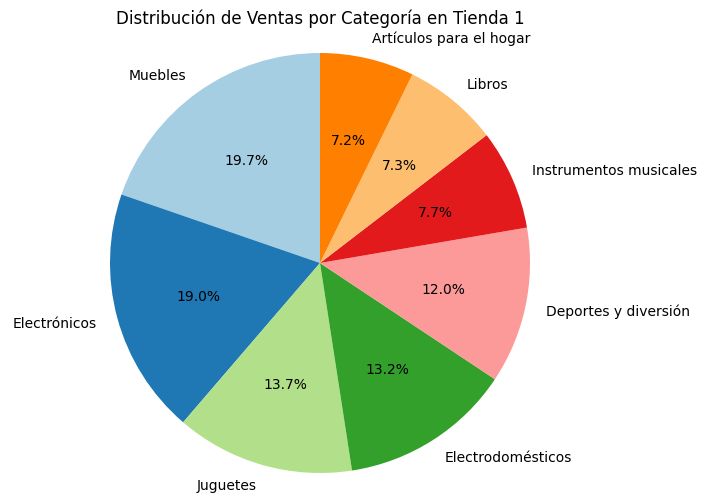

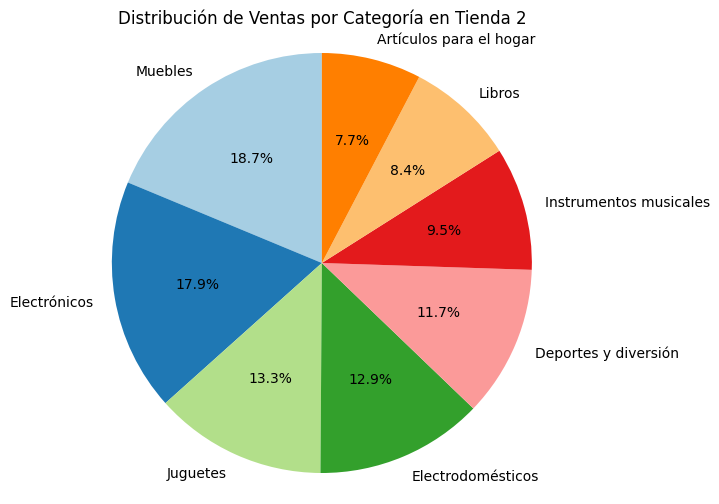

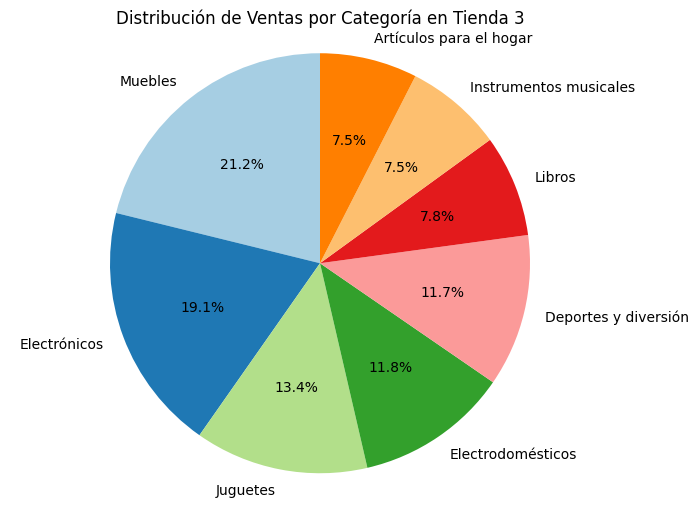

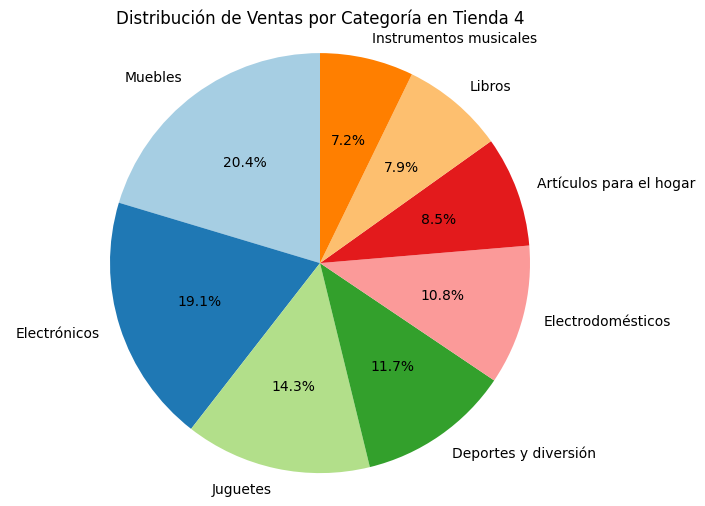

In [49]:
import matplotlib.pyplot as plt

def plot_ventas_por_categoria(tienda, tienda_nombre):
    categoria_ventas = tienda["Categoría del Producto"].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(categoria_ventas, labels=categoria_ventas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"Distribución de Ventas por Categoría en {tienda_nombre}")
    plt.axis('equal')
    plt.show()

plot_ventas_por_categoria(tienda, "Tienda 1")
plot_ventas_por_categoria(tienda2, "Tienda 2")
plot_ventas_por_categoria(tienda3, "Tienda 3")
plot_ventas_por_categoria(tienda4, "Tienda 4")


# 3. Calificación promedio de la tienda


In [35]:
def promedio(tienda, columna):
    prom = round(tienda[columna].mean(), 2)
    return prom

promedio_1 = promedio(tienda, "Calificación")
promedio_2 = promedio(tienda2, "Calificación")
promedio_3 = promedio(tienda3, "Calificación")
promedio_4 = promedio(tienda4, "Calificación")

resumen = pd.DataFrame({
    "Clasificación promedio": [promedio_1, promedio_2, promedio_3, promedio_4]
}, index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])

resumen


,Clasificación promedio
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# 4. Productos más y menos vendidos

In [36]:
def ventas(tienda):
    producto = tienda["Producto"].value_counts()
    max_freq = producto.idxmax()
    min_freq = producto.idxmin()
    maximo = producto.max()
    minimo = producto.min()
    print(f"Producto más vendido: {max_freq} ({maximo} veces)")
    print(f"Producto menos vendido: {min_freq} ({minimo} veces)")

print("Tienda 1")
ventas(tienda)
print("Tienda 2")
ventas(tienda2)
print("Tienda 3")
ventas(tienda3)
print("Tienda 4")
ventas(tienda4)

Tienda 1
Producto más vendido: Microondas (60 veces)
Producto menos vendido: Auriculares con micrófono (33 veces)
Tienda 2
Producto más vendido: Iniciando en programación (65 veces)
Producto menos vendido: Juego de mesa (32 veces)
Tienda 3
Producto más vendido: Kit de bancas (57 veces)
Producto menos vendido: Bloques de construcción (35 veces)
Tienda 4
Producto más vendido: Cama box (62 veces)
Producto menos vendido: Guitarra eléctrica (33 veces)


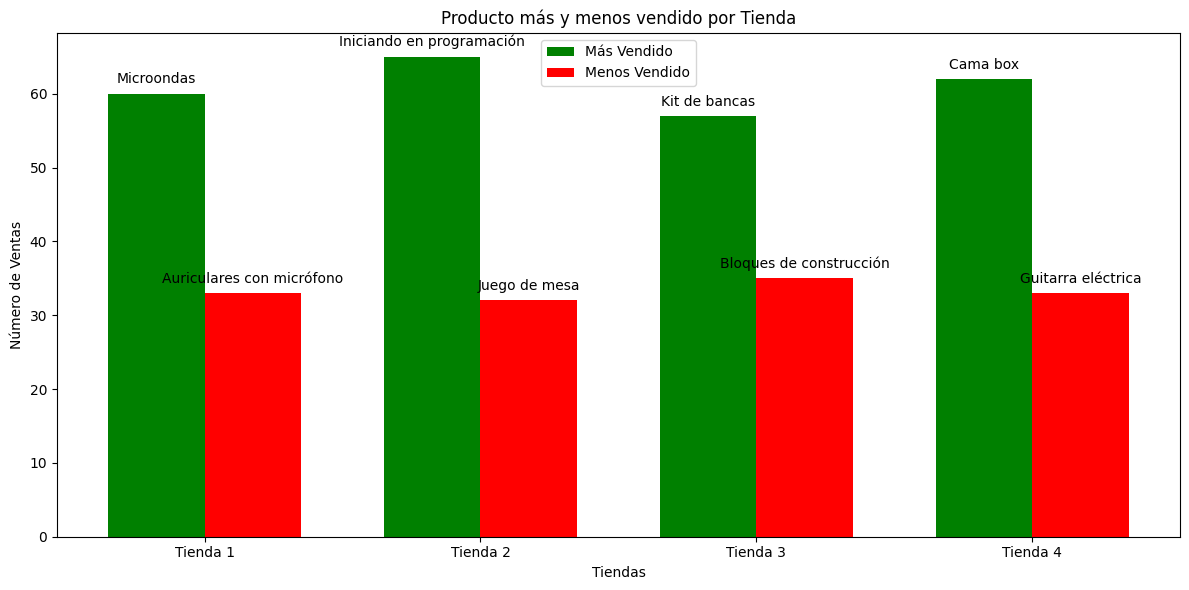

In [46]:
import matplotlib.pyplot as plt

def plot_productos_mas_menos_vendidos(tiendas):
    productos_mas_vendidos = []
    productos_menos_vendidos = []
    ventas_mas_vendidos = []
    ventas_menos_vendidos = []

    for tienda, tienda_nombre in tiendas:
        producto = tienda["Producto"].value_counts()

        mas_vendido = producto.idxmax()
        menos_vendido = producto.idxmin()

        ventas_mas_vendido = producto.max()
        ventas_menos_vendido = producto.min()

        productos_mas_vendidos.append(mas_vendido)
        productos_menos_vendidos.append(menos_vendido)
        ventas_mas_vendidos.append(ventas_mas_vendido)
        ventas_menos_vendidos.append(ventas_menos_vendido)

    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.35
    index = range(len(tiendas))

    ax.bar(index, ventas_mas_vendidos, bar_width, label='Más Vendido', color='green')
    ax.bar([i + bar_width for i in index], ventas_menos_vendidos, bar_width, label='Menos Vendido', color='red')

    ax.set_xlabel('Tiendas')
    ax.set_ylabel('Número de Ventas')
    ax.set_title('Producto más y menos vendido por Tienda')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels([tienda_nombre for _, tienda_nombre in tiendas])

    for i, (mas, menos) in enumerate(zip(productos_mas_vendidos, productos_menos_vendidos)):
        ax.text(i, ventas_mas_vendidos[i] + 1, mas, ha='center', va='bottom', fontsize=10, color='black')
        ax.text(i + bar_width, ventas_menos_vendidos[i] + 1, menos, ha='center', va='bottom', fontsize=10, color='black')

    ax.legend()

    plt.tight_layout()
    plt.show()

tiendas = [(tienda, "Tienda 1"), (tienda2, "Tienda 2"), (tienda3, "Tienda 3"), (tienda4, "Tienda 4")]

plot_productos_mas_menos_vendidos(tiendas)

# 5. Envío promedio por tienda

In [39]:
def costo_envio_promedio(tienda):
    if "Costo de envío" in tienda.columns:
        costo = tienda["Costo de envío"].mean()
        return round(costo, 2)
    else:
        print("La columna 'Costo de envío' no existe en el DataFrame.")
        return None

costo_1 = costo_envio_promedio(tienda)
costo_2 = costo_envio_promedio(tienda2)
costo_3 = costo_envio_promedio(tienda3)
costo_4 = costo_envio_promedio(tienda4)

if costo_1 is not None:
    print("Tienda 1 - Costo de Envío Promedio:", costo_1)
if costo_2 is not None:
    print("Tienda 2 - Costo de Envío Promedio:", costo_2)
if costo_3 is not None:
    print("Tienda 3 - Costo de Envío Promedio:", costo_3)
if costo_4 is not None:
    print("Tienda 4 - Costo de Envío Promedio:", costo_4)


Tienda 1 - Costo de Envío Promedio: 26018.61
Tienda 2 - Costo de Envío Promedio: 25216.24
Tienda 3 - Costo de Envío Promedio: 24805.68
Tienda 4 - Costo de Envío Promedio: 23459.46


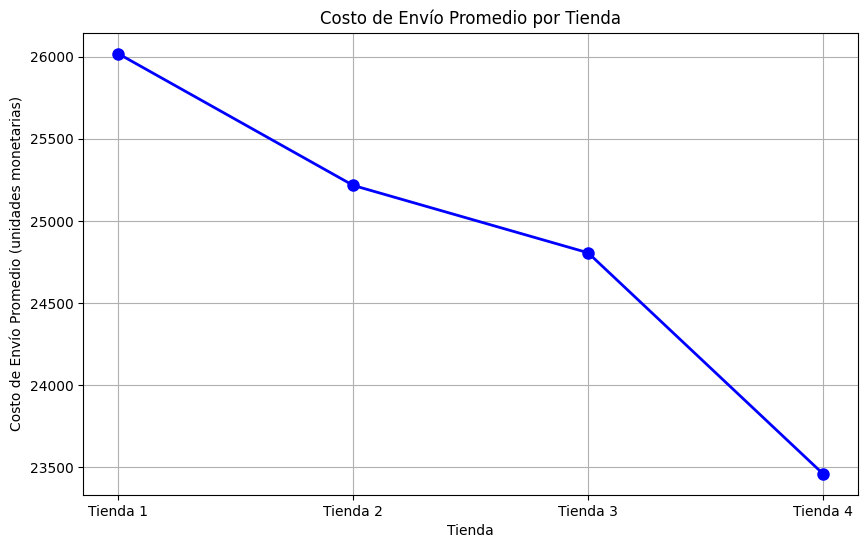

In [41]:
def plot_costo_envio_promedio(costos_envio, tiendas):
    plt.figure(figsize=(10, 6))
    plt.plot(tiendas, costos_envio, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
    plt.title("Costo de Envío Promedio por Tienda")
    plt.xlabel("Tienda")
    plt.ylabel("Costo de Envío Promedio (unidades monetarias)")
    plt.grid(True)
    plt.show()

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
costos_envio = [costo_1, costo_2, costo_3, costo_4]

plot_costo_envio_promedio(costos_envio, tiendas)


# Informe final

La Tienda 4 es la peor opción, se recomienda venderla al Sr. Juan, esto debido a su bajo rendimiento en ingresos y la presencia de productos no vendidos, lo que afecta directamente su rentabilidad, a pesar de sus calificaciones relativamente buenas y costos de envío bajos, la tienda no está generando suficientes ventas para ser rentable a largo plazo.